In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import random
from datetime import time
%matplotlib inline

random.seed(100)

datadir = './data/'

data_raw = pd.read_csv(datadir + 'JPvideos.csv',encoding='cyrillic')
tidy = data_raw.copy(deep=True)
data_raw.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,5ugKfHgsmYw,18.07.02,щИшЊууЊухчДуЋшНфИяМшЗЏфИуЎшЛу...,цфКщфПЁц хуЛуГуПуМ,25,2018-02-06T03:04:37.000Z,"фКц |""фНшГ""|""фНшГч""|""ууЊуГууПу...",188085,591,189,0,https://i.ytimg.com/vi/5ugKfHgsmYw/default.jpg,True,False,False,фНшГччЅхМхИуЎцАхЎЖуЋхЂшНуущИф...
1,ohObafdd34Y,18.07.02,уЄууQ учЅ­учЗхЎЎхЗУцшЖ хЗЈхЄЇу...,чЅшАЗуууЊ Kamiya Erina 2,1,2018-02-06T04:01:56.000Z,[none],90929,442,88,174,https://i.ytimg.com/vi/ohObafdd34Y/default.jpg,False,False,False,NaN
2,aBr2kKAHN6M,18.07.02,Live Views of Starman,SpaceX,28,2018-02-06T21:38:22.000Z,[none],6408303,165892,2331,3006,https://i.ytimg.com/vi/aBr2kKAHN6M/default.jpg,False,False,False,NaN
3,5wNnwChvmsQ,18.07.02,цБфКЌууЃуКууМуЊуОуМууЎх у­уЃу...,уЂуЗуПууЏууЄ,25,2018-02-06T06:08:49.000Z,уЂуЗуПууЏууЄ,96255,1165,277,545,https://i.ytimg.com/vi/5wNnwChvmsQ/default.jpg,False,False,False,цБфКЌууЃуКууМуЊуОуМууЎх у­уЃу...
4,B7J47qFvdsk,18.07.02,цІЎххЅу ушЁцуЎц­Луу уЕуяМц ч...,уЗууууЅууЄ,1,2018-02-06T02:30:00.000Z,[none],108408,1336,74,201,https://i.ytimg.com/vi/B7J47qFvdsk/default.jpg,False,False,False,хЎЖуЋхИАуЃуІуууЕуЉуЊуМууГуЎуу...


# Preprocessing

Convert times to date

In [2]:
tidy['publish_time'] = pd.to_datetime(tidy.publish_time)
tidy['publish_date'] = pd.DatetimeIndex(tidy.publish_time).normalize()
tidy['trending_date'] = '20' + tidy['trending_date'] 
tidy['trending_date'] = pd.to_datetime(tidy.trending_date, format='%Y.%d.%m')

Convert the publish time to which day of the week it was published on

In [3]:
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tidy['published_weekday'] = tidy.publish_time.dt.dayofweek
tidy['published_weekday'] = tidy['published_weekday'].apply(lambda x: weekday_labels[int(x)])

Get the number of days between published and trending

In [4]:
tidy.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,published_weekday
0,5ugKfHgsmYw,2018-02-07,щИшЊууЊухчДуЋшНфИяМшЗЏфИуЎшЛу...,цфКщфПЁц хуЛуГуПуМ,25,2018-02-06 03:04:37+00:00,"фКц |""фНшГ""|""фНшГч""|""ууЊуГууПу...",188085,591,189,0,https://i.ytimg.com/vi/5ugKfHgsmYw/default.jpg,True,False,False,фНшГччЅхМхИуЎцАхЎЖуЋхЂшНуущИф...,2018-02-06 00:00:00+00:00,Tuesday
1,ohObafdd34Y,2018-02-07,уЄууQ учЅ­учЗхЎЎхЗУцшЖ хЗЈхЄЇу...,чЅшАЗуууЊ Kamiya Erina 2,1,2018-02-06 04:01:56+00:00,[none],90929,442,88,174,https://i.ytimg.com/vi/ohObafdd34Y/default.jpg,False,False,False,NaN,2018-02-06 00:00:00+00:00,Tuesday
2,aBr2kKAHN6M,2018-02-07,Live Views of Starman,SpaceX,28,2018-02-06 21:38:22+00:00,[none],6408303,165892,2331,3006,https://i.ytimg.com/vi/aBr2kKAHN6M/default.jpg,False,False,False,NaN,2018-02-06 00:00:00+00:00,Tuesday
3,5wNnwChvmsQ,2018-02-07,цБфКЌууЃуКууМуЊуОуМууЎх у­уЃу...,уЂуЗуПууЏууЄ,25,2018-02-06 06:08:49+00:00,уЂуЗуПууЏууЄ,96255,1165,277,545,https://i.ytimg.com/vi/5wNnwChvmsQ/default.jpg,False,False,False,цБфКЌууЃуКууМуЊуОуМууЎх у­уЃу...,2018-02-06 00:00:00+00:00,Tuesday
4,B7J47qFvdsk,2018-02-07,цІЎххЅу ушЁцуЎц­Луу уЕуяМц ч...,уЗууууЅууЄ,1,2018-02-06 02:30:00+00:00,[none],108408,1336,74,201,https://i.ytimg.com/vi/B7J47qFvdsk/default.jpg,False,False,False,хЎЖуЋхИАуЃуІуууЕуЉуЊуМууГуЎуу...,2018-02-06 00:00:00+00:00,Tuesday


### Convert the video category ids to actual readable text

Our tidy data will be in a variable named tidy. We removed ratings, comments, thumbnail_link from out columns. After that, we will start  by binning the publish_time column into Late-night (12am-7am), morning(7am-11am), noon(11am-12pm), afternoon (12pm-7pm), Night(7pm-12am

In [5]:
del tidy['ratings_disabled']
del tidy['comments_disabled']
del tidy['thumbnail_link']
del tidy['video_error_or_removed']

In [6]:
periods = {'12a-6a': [time(0), time(6)], '6a-12p': [time(6), time(12)], 
           '12p-6p': [time(12), time(18)],
          '6p-12a': [time(18), time(23)]}

In [7]:
def bin_values(x, labels=periods):
    for k, v in labels.items():
        if x.hour >= v[0].hour and x.hour < v[1].hour:
            return k
    return 'Unknown_period'
            

In [8]:
tidy['publish_time'] = tidy['publish_time'].apply(bin_values)

We will update the video categories with their representative name

In [9]:
video_categories = pd.read_csv(datadir + 'youtube_video_categories.csv', names=['id', 'title'])

In [10]:
video_categories.head()

,id,title
0,2,Autos & Vehicles
1,1,Film & Animation
2,10,Music
3,15,Pets & Animals
4,17,Sports


In [11]:
cat_values = []
for index, video_id in enumerate(tidy['category_id']):
    cat = video_categories[ video_categories['id'] == video_id]['title'].iloc[0]
    cat_values.append(cat)

tidy['category_names'] = pd.Series(cat_values, index=[i for i in range(0, len(tidy))])

In [12]:
tidy.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,publish_date,published_weekday,category_names
0,5ugKfHgsmYw,2018-02-07,щИшЊууЊухчДуЋшНфИяМшЗЏфИуЎшЛу...,цфКщфПЁц хуЛуГуПуМ,25,12a-6a,"фКц |""фНшГ""|""фНшГч""|""ууЊуГууПу...",188085,591,189,0,фНшГччЅхМхИуЎцАхЎЖуЋхЂшНуущИф...,2018-02-06 00:00:00+00:00,Tuesday,News & Politics
1,ohObafdd34Y,2018-02-07,уЄууQ учЅ­учЗхЎЎхЗУцшЖ хЗЈхЄЇу...,чЅшАЗуууЊ Kamiya Erina 2,1,12a-6a,[none],90929,442,88,174,NaN,2018-02-06 00:00:00+00:00,Tuesday,Film & Animation
2,aBr2kKAHN6M,2018-02-07,Live Views of Starman,SpaceX,28,6p-12a,[none],6408303,165892,2331,3006,NaN,2018-02-06 00:00:00+00:00,Tuesday,Science & Technology
3,5wNnwChvmsQ,2018-02-07,цБфКЌууЃуКууМуЊуОуМууЎх у­уЃу...,уЂуЗуПууЏууЄ,25,6a-12p,уЂуЗуПууЏууЄ,96255,1165,277,545,цБфКЌууЃуКууМуЊуОуМууЎх у­уЃу...,2018-02-06 00:00:00+00:00,Tuesday,News & Politics
4,B7J47qFvdsk,2018-02-07,цІЎххЅу ушЁцуЎц­Луу уЕуяМц ч...,уЗууууЅууЄ,1,12a-6a,[none],108408,1336,74,201,хЎЖуЋхИАуЃуІуууЕуЉуЊуМууГуЎуу...,2018-02-06 00:00:00+00:00,Tuesday,Film & Animation


## Correlation Analysis

Let's analyze the correlation between the variables

In [13]:
tidy[['category_id', 'views', 'likes', 'dislikes', 'comment_count']].corr()

,category_id,views,likes,dislikes,comment_count
category_id,1.000000,-0.032998,-0.060024,-0.019799,-0.042557
views,-0.032998,1.000000,0.850367,0.804670,0.843851
likes,-0.060024,0.850367,1.000000,0.732570,0.940304
dislikes,-0.019799,0.804670,0.732570,1.000000,0.809898
comment_count,-0.042557,0.843851,0.940304,0.809898,1.000000


We can see that there is high correlation between views, likes, dislikes, and comment_count. Same for the comment_count-views vs views-dislikes Let's apply a t-test and look at the p-values to check if these correlation values are meaningful.

In [14]:
print(scipy.stats.ttest_ind(tidy.views, tidy.comment_count))
print(scipy.stats.ttest_ind(tidy.likes, tidy.comment_count))
print(scipy.stats.ttest_ind(tidy.dislikes, tidy.comment_count))
print(scipy.stats.ttest_ind(tidy.likes, tidy.views))
print(scipy.stats.ttest_ind(tidy.dislikes, tidy.views))

Ttest_indResult(statistic=28.85308910367379, pvalue=3.014869227126269e-181)
Ttest_indResult(statistic=11.54468374976686, pvalue=8.762420781810224e-31)
Ttest_indResult(statistic=-7.826834353220041, pvalue=5.1224267528864725e-15)
Ttest_indResult(statistic=-28.03698947541739, pvalue=2.3890337288703493e-171)
Ttest_indResult(statistic=-28.94668931536058, pvalue=2.120997328201443e-182)


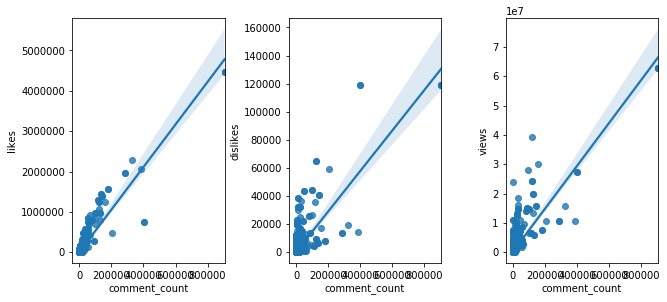

In [15]:
fig, ax = plt.subplots(1, 3)
fig.tight_layout()
plt.subplots_adjust(left=-0.4)
lplot = sns.regplot(data=tidy, x='comment_count', y='likes', ax=ax[0])
#lplot.set(xticks=[])
lplot2 = sns.regplot(data=tidy, x='comment_count', y='dislikes', ax=ax[1])
#lplot2.set(xticks=[])
lplot3 = sns.regplot(data=tidy, x='comment_count', y='views', ax=ax[2])

### Let's analyze the video categories

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

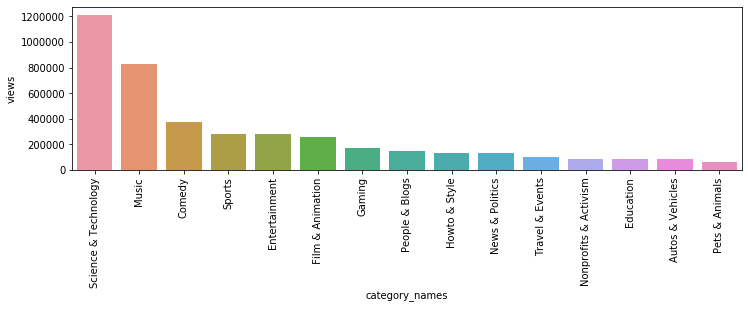

In [16]:
byviews = tidy.groupby('category_names').mean().reset_index().sort_values('views', ascending=False)
plt.figure(figsize=(12, 3))
sns.barplot(data=byviews, x='category_names', y='views', ci=None)
plt.xticks(rotation=90)

Seems like film & animation, music, and science and technology get the most views, while politics and news get the least. We can get the same plots for likes and dislikes for each category.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

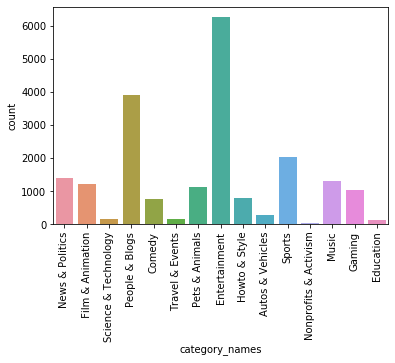

In [17]:
sns.countplot(x='category_names', data=tidy)
plt.xticks(rotation=90)

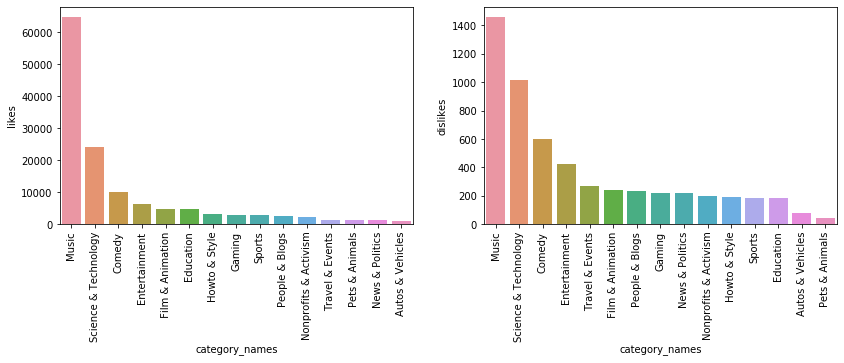

In [18]:
figs, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.subplots_adjust(left=-0.9)


bylikes = tidy.groupby('category_names').mean().reset_index().sort_values('likes', ascending=False)
sns.barplot(data=bylikes, x='category_names', y='likes', ci=None, ax=ax[0])
bydislikes = tidy.groupby('category_names').mean().reset_index().sort_values('dislikes', ascending=False)
sns.barplot(data=bydislikes, x='category_names', y='dislikes', ci=None, ax=ax[1])

for axes in figs.axes:
    plt.sca(axes)
    plt.xticks(rotation=90)

We see that likes and dislikes are on par with each other. Let's see which categories get the most comments from viewers. This could give us insight into what category of videos the viewers like to show expression (by leaving comments).

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

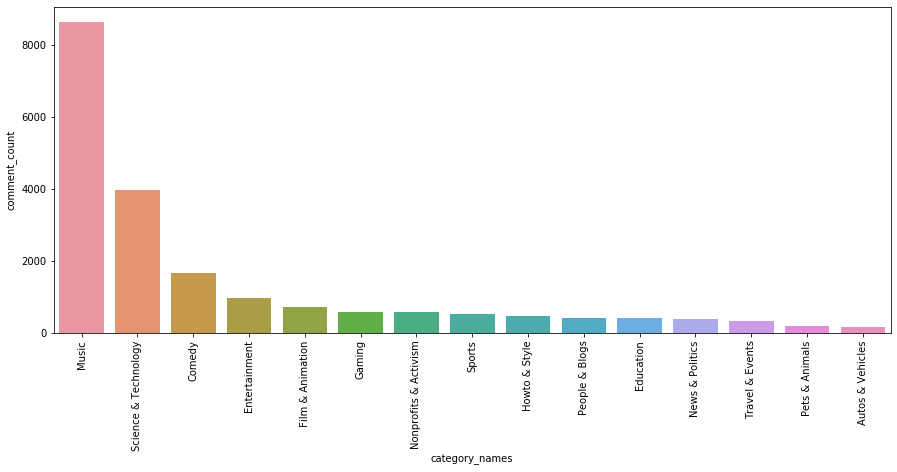

In [19]:
plt.figure(figsize=(15, 6))
bycomment = tidy.groupby('category_names').mean().reset_index().sort_values('comment_count', ascending=False)
sns.barplot(data=bycomment, x='category_names', y='comment_count', ci=None)
plt.xticks(rotation=90)